In [21]:

import numpy as np
import seaborn.apionly as sns
import itertools 

import bokeh
import pandas as pd


from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()


ncolors = 5
palette = sns.palettes.color_palette('colorblind', ncolors)
# as hex is necessary for bokeh to render the colors properly.
colors = itertools.cycle(palette.as_hex())

#!wget "http://biosignalsplux.com/downloads/samples/sensor_samples/biosignalsplux_Blood_Volume_Pulse_(BVP)_Sample.txt"

Loading BokehJS ...

In [ ]:
import h5py # you must install h5py for python
dataFile = h5py.File("arthrokinemat_2018_06_02_23_32_31.h5", "r")
dataSet = dataFile["data"][:]
dataFile.close()
signal = dataSet # from frame 10000 to frame 15000

def norm(s):
    return (s-s.mean())/s.std()




In [23]:


# create a new plot with a title and axis labels
plot = figure(title="Data",  output_backend="webgl", plot_width=900, plot_height=300)

plot.toolbar.logo = None
#plot.toolbar_location = None

from bokeh.models import WheelZoomTool
plot.toolbar.active_scroll = plot.select_one(WheelZoomTool) 




skip = 10
time = arange(len(signal[:,0]))[::skip]
for i,c in zip(range(0,signal.shape[1]), colors):
    s = signal[:,i][::skip]
    s =(s-np.mean(s))/np.std(s)
    plot.line( time,s+i*6, color=c)
show(plot, notebook_handle=True)


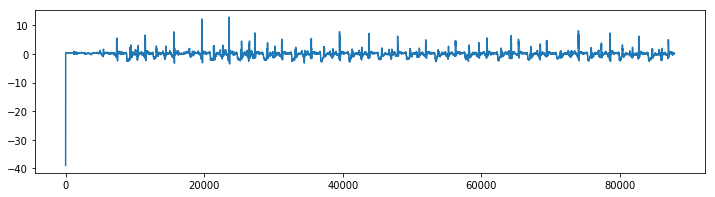

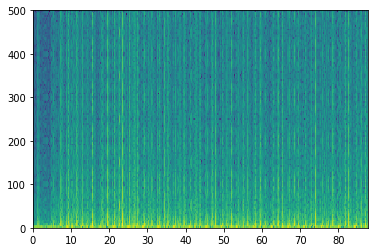

In [25]:
from scipy.io.wavfile import write
s = signal[:,11][::]
s =(s-np.mean(s))/np.std(s)
pylab.figure(figsize=(12,3))
pylab.plot(s)
pylab.figure()
pylab.specgram(np.array(s),Fs=1000)
1
write("test.wav", 10000, np.array(s/10))